In [146]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [147]:
class CustomDataset(Dataset):
    def __init__(self, images_file, labels_file, transform=None):
        self.images = self.load_images(images_file)
        self.labels = self.load_labels(labels_file)
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

    def load_images(self, file_path):
        with open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), dtype=np.uint8, offset=16)  # Skip first 16 bytes
        num_images = len(data) // (28 * 28)
        data = data.reshape(num_images, 28, 28)
        return data.copy()  # Ensure the array is writable

    def load_labels(self, file_path):
        with open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), dtype=np.uint8, offset=8)  # Skip first 8 bytes
        return data

In [148]:
train_images_file = "dataset/train-images-idx3-ubyte"
train_labels_file = "dataset/train-labels-idx1-ubyte"
validation_images_file = "dataset/validation-images-idx3-ubyte"
validation_labels_file = "dataset/validation-labels-idx1-ubyte"

batch_size = 6

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(0.5, 0.5)])

train_set = CustomDataset(train_images_file, train_labels_file, transform=transform)
validation_set = CustomDataset(validation_images_file, validation_labels_file, transform=transform)

validation_loader = DataLoader(validation_set, batch_size=batch_size, shuffle=True)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)

'''
train_set = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
validation_set = torchvision.datasets.MNIST(root='./data', train=False,
                                        download=True, transform=transform)

validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
'''

"\ntrain_set = torchvision.datasets.MNIST(root='./data', train=True,\n                                        download=True, transform=transform)\nvalidation_set = torchvision.datasets.MNIST(root='./data', train=False,\n                                        download=True, transform=transform)\n\nvalidation_loader = torch.utils.data.DataLoader(validation_set, batch_size=batch_size,\n                                         shuffle=False, num_workers=2)\ntrain_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,\n                                          shuffle=True, num_workers=2)\n"

In [149]:
with open('dictionnary_labels.txt', 'r') as file:
    lines = file.readlines()

map_dict = {}

for line in lines:
    line = line.strip()
    key, value = line.split('_')
    map_dict[int(key) - 1] = value

print(map_dict[0])

"""
map_dict = {0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9"}
print(map_dict[0])
"""

Alef


'\nmap_dict = {0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9"}\nprint(map_dict[0])\n'

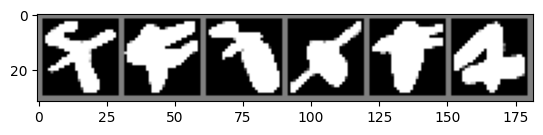

Waw   Alef  Waw   Tav   Alef  Yod  


In [150]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{map_dict[int(labels[j])]:5s}' for j in range(batch_size)))

In [151]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 22)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [152]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [153]:
for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 11 == 0:    # print every 2 mini-batches for this example
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2:.3f}')
            running_loss = 0.0

print('Finished Training')

PATH = './PNA_net.pth'
torch.save(net.state_dict(), PATH)

[1,     1] loss: 1.548
[1,    12] loss: 17.058
[1,    23] loss: 16.911
[1,    34] loss: 16.824
[1,    45] loss: 16.634
[1,    56] loss: 16.523
[2,     1] loss: 1.484
[2,    12] loss: 16.290
[2,    23] loss: 16.055
[2,    34] loss: 15.884
[2,    45] loss: 15.557
[2,    56] loss: 15.181
[3,     1] loss: 1.326
[3,    12] loss: 13.609
[3,    23] loss: 12.359
[3,    34] loss: 11.035
[3,    45] loss: 10.917
[3,    56] loss: 9.863
[4,     1] loss: 0.839
[4,    12] loss: 10.371
[4,    23] loss: 9.481
[4,    34] loss: 9.029
[4,    45] loss: 8.262
[4,    56] loss: 8.008
[5,     1] loss: 0.945
[5,    12] loss: 7.968
[5,    23] loss: 7.746
[5,    34] loss: 6.629
[5,    45] loss: 6.454
[5,    56] loss: 5.724
[6,     1] loss: 0.539
[6,    12] loss: 6.352
[6,    23] loss: 5.792
[6,    34] loss: 5.513
[6,    45] loss: 5.703
[6,    56] loss: 4.975
[7,     1] loss: 0.157
[7,    12] loss: 5.281
[7,    23] loss: 4.528
[7,    34] loss: 4.284
[7,    45] loss: 4.274
[7,    56] loss: 4.223
[8,     1] loss: 0.

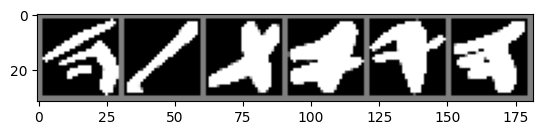

Hey   Lamed Tav   Yod   Yod   Hey  


In [154]:
dataiter = iter(validation_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{map_dict[int(labels[j])]:5s}' for j in range(batch_size)))

In [155]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [156]:
outputs = net(images)

In [157]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{map_dict[int(predicted[j])]:5s}'
                              for j in range(batch_size)))

Predicted:  Hey   Lamed Yod   Yod   Waw   Yod  


In [158]:
def predict_solution(outputs, batch_size, topk) :
    # Rescales them so that the elements of the n-dimensional output Tensor lie in the range [0,1] and sum to 1.
    probabilities = F.softmax(outputs, dim=1)

    # Retrieve the top 3 predictions for each image
    top_probs, top_labels = torch.topk(probabilities, topk, dim=1)

    # Mapping labels to classes
    predictions = []
    for i in range(batch_size):
        predictions.append([(map_dict[int(top_labels[i][j])], top_probs[i][j].item()) for j in range(topk)])

    # Display predictions
    for i, preds in enumerate(predictions):
        print(f'Image {i+1}:')
        for label, prob in preds:
            print(f'  {label}: {prob*100:.2f}%')

In [159]:
predict_solution(outputs, batch_size, 5);

Image 1:
  Hey: 99.80%
  Yod: 0.20%
  Alef: 0.00%
  Shin: 0.00%
  Lamed: 0.00%
Image 2:
  Lamed: 98.80%
  Tav: 1.19%
  Alef: 0.00%
  Shin: 0.00%
  Hey: 0.00%
Image 3:
  Yod: 38.85%
  Tav: 30.89%
  Shin: 24.88%
  Lamed: 1.88%
  Alef: 1.55%
Image 4:
  Yod: 98.80%
  Shin: 1.08%
  Alef: 0.07%
  Hey: 0.03%
  Tav: 0.02%
Image 5:
  Waw: 91.31%
  Yod: 6.78%
  Alef: 1.56%
  Tav: 0.34%
  Shin: 0.00%
Image 6:
  Yod: 81.95%
  Hey: 8.21%
  Alef: 4.76%
  Tav: 4.59%
  Shin: 0.28%


In [160]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

image = Image.open("test_image_1.jpg")
image = ImageOps.invert(image.convert('L'))
image = transform(image)
image = image.unsqueeze(0)

outputs2 = net(image)

predict_solution(outputs2, 1, 5)

image = Image.open("test_image_2.jpg")
image = ImageOps.invert(image.convert('L'))
image = transform(image)
image = image.unsqueeze(0)

outputs2 = net(image)

predict_solution(outputs2, 1, 5)

Image 1:
  Hey: 95.35%
  Yod: 4.25%
  Shin: 0.13%
  Lamed: 0.09%
  Alef: 0.05%
Image 1:
  Shin: 56.28%
  Yod: 42.52%
  Hey: 1.09%
  Alef: 0.03%
  Zain: 0.01%
